In [1]:
#creating a dataset
from sklearn.datasets import make_blobs
centroids = [(-5,-5),(5,5)]
cluster_std = [1,1]
x,y = make_blobs(n_samples = 100,cluster_std=cluster_std,centers=centroids,n_features = 2,random_state=2)

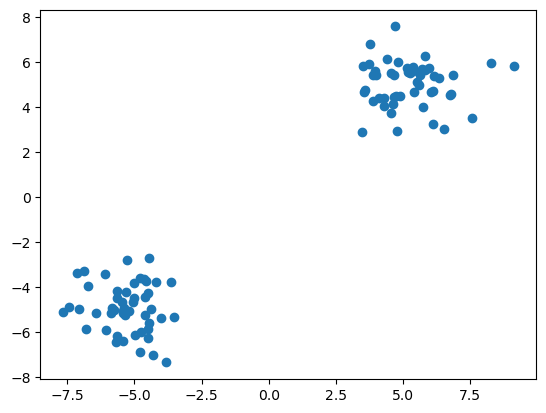

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])

In [60]:
import random
import numpy as np

class KMeans:
    def __init__(self, n_clusters=2, max_iter=100):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None

    def fit_predict(self, x):
        random_index = random.sample(range(0, x.shape[0]), self.n_clusters)
        self.centroids = x[random_index]

        for i in range(self.max_iter):
            cluster_group = self.assign_clusters(x)
            old_centroids = self.centroids
            self.centroids = self.move_centroids(x, cluster_group)  
            if np.array_equal(old_centroids, self.centroids):  
                break

        return cluster_group

    def assign_clusters(self, x):
        cluster_group = []
        distances = []
        for row in x:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row - centroid, row - centroid)))
            min_distance = min(distances)
            index_pos = distances.index(min_distance)
            cluster_group.append(index_pos)
            distances.clear()
        return np.array(cluster_group)

    def move_centroids(self, x, cluster_group):
        new_centroids = []
        cluster_type = np.unique(cluster_group)
        for type in cluster_type:
            new_centroids.append(x[cluster_group == type].mean(axis=0))
        return np.array(new_centroids)

[1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 1 0]


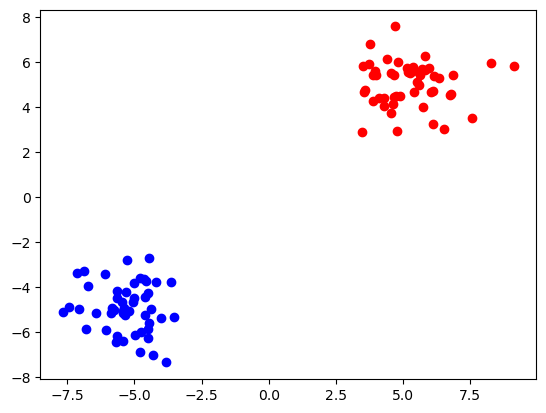

In [61]:
km = KMeans(n_clusters = 2,max_iter=100)
y_means = km.fit_predict(x)
print(y_means)
plt.scatter(x[y_means == 0,0],x[y_means == 0,1],color = 'red')
plt.scatter(x[y_means == 1,0],x[y_means == 1,1],color = 'blue')